# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4


In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [3]:
# ваш код
air_df = pd.read_csv('airquality.csv')
air_df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


Details

Daily readings of the following air quality values for May 1, 1973 (a Tuesday) to September 30, 1973.

**Ozone**: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island

**Solar.R**: Solar radiation in Langleys in the frequency band 4000--7700 Angstroms from 0800 to 1200 hours at Central Park

**Wind**: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport

**Temp**: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [13]:
# ваш код
stats = air_df.drop(columns=['Month', 'Day']).describe().round(2)
stats

,Ozone,Solar.R,Wind,Temp
count,116.00,146.00,153.00,153.00
mean,42.13,185.93,9.96,77.88
std,32.99,90.06,3.52,9.47
min,1.00,7.00,1.70,56.00
25%,18.00,115.75,7.40,72.00
50%,31.50,205.00,9.70,79.00
75%,63.25,258.75,11.50,85.00
max,168.00,334.00,20.70,97.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:**  В признаках Wind и Temp выбросы незначительны, в Solar.R выбросы умеренные, в Ozone больше всех подвержен выбросам.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

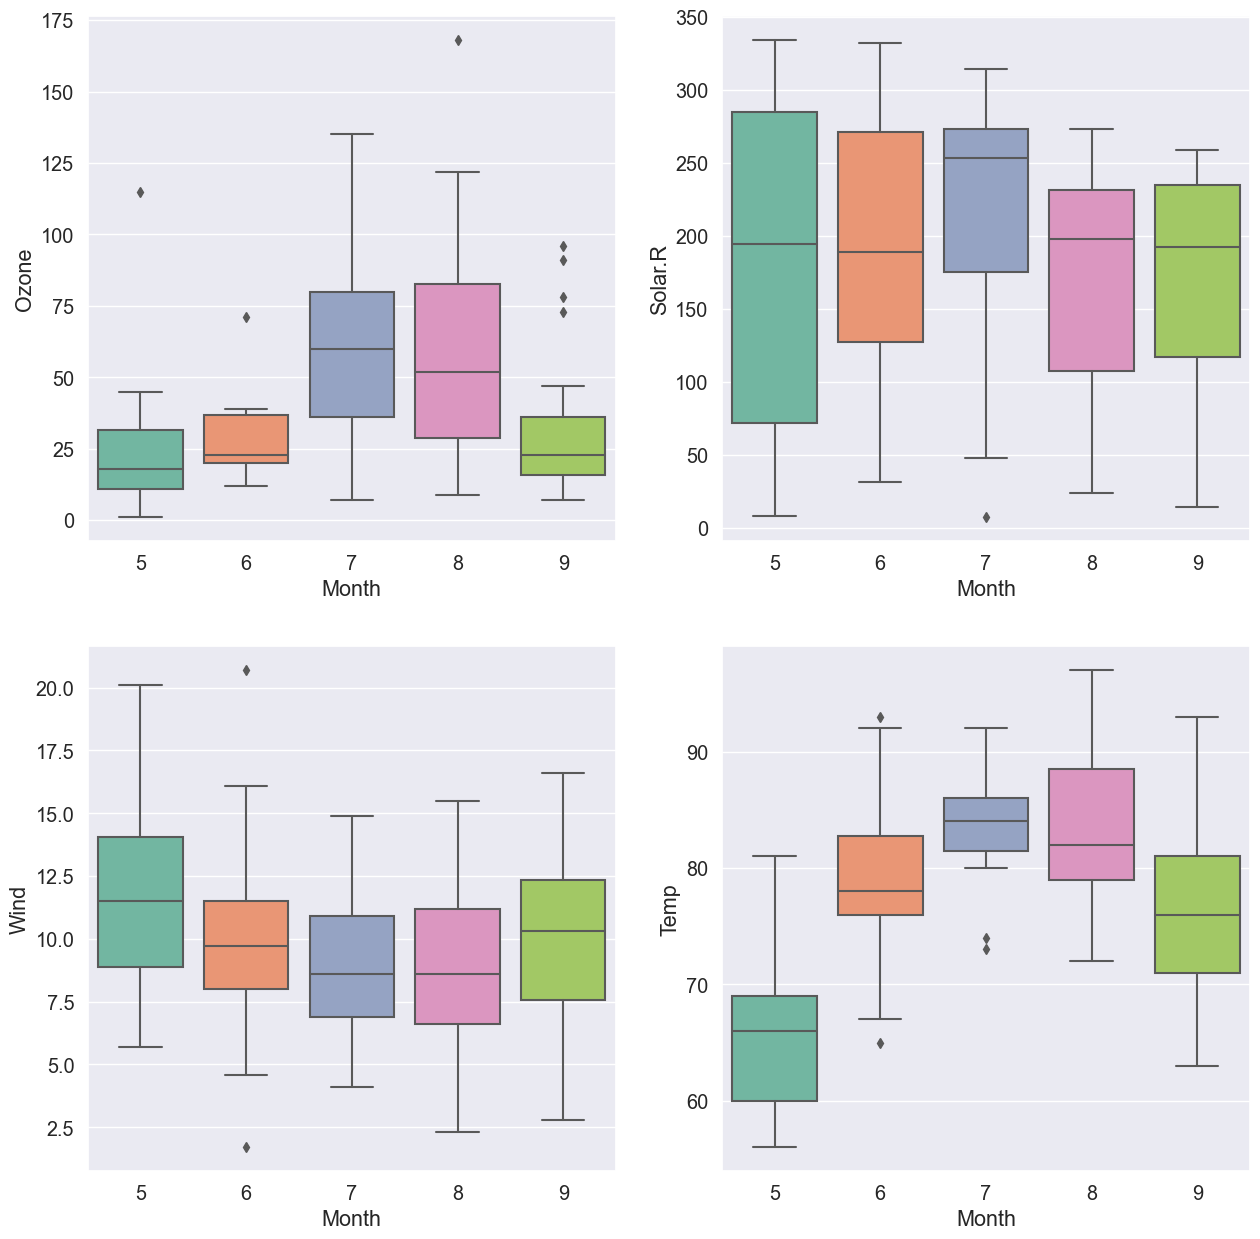

In [24]:
# ваш код
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for idx, feature in enumerate(air_df.columns.drop(['Month', 'Day'])):
    sns.boxplot(data=air_df, x='Month', y=feature, ax=axes[idx // 2][idx % 2])

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**

Структура: внутри ящика отмечается выборочная медиана. Нижний и верхний края ящика соответствуют выборочному квантилю $\widehat{U}_{0.25}$ и $\widehat{U}_{0.75}$  соответственно. Нижний и верхний усы соответствуют величинам $\widehat{U}_{0.25} - 1.5(\widehat{U}_{0.75} - \widehat{U}_{0.25})$ и $\widehat{U}_{0.75} + 1.5(\widehat{U}_{0.75} - \widehat{U}_{0.25})$ соответственно. Точки вне усов считаются выбросами

Выводы: 

Ozone: Выбросы наблюдаются только в бОльшую сторону и присутствуют во всех месяцах Июля. Выборочная медиана изменяется значительно(примерно от 20 до 60). Разброс значений также сильно варьируется(в Июне самый маленький, в Июле - самый большой).

Solar.R: Выброс наблюдается в меньшую сторону и только в Июле. В этом же месяце выбивается медиана, по сравнению с примерно раными медианами за другие месяцы. Разброс значений примерно одинаково большой.

Wind: Выбросы наблюдаются в обе стороны и только в Июне. Медиана меняется, но не сильно. Разброс везде приблизительно равно большой.

Temp: Выбросы в обе стороны, в Июне и в Июле. Медиана меняется значительно (от 65 до 85 приблизительно). В Июле характерно маленький разброс.

Таким образом, как и ожидалось, в Ozone выбросов больше всего. Однако, в Solar.R их меньше, чем в Temp, хоть и различие среднего и медианы в Solar.R больше.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [29]:
# ваш код
print(f"Ozone median = {stats.loc['50%','Ozone']}")
print(f"Ozone mean = {stats.loc['mean','Ozone']}")
print(f"MAPE(med, mean) = {stats.apply(lambda x: abs((x['50%'] - x['mean']) / x['50%']), axis=0).Ozone:.3f}")

Ozone median = 31.5
Ozone mean = 42.13
MAPE(med, mean) = 0.337


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Выборочное среднее неустройчиво к выбросам, а выборочная медиана - устойчива.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Думаю, да. Измерения проводились каждый день, и обычно такие измерения считаются независимыми.

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** Может не выполняться во временных рядах, таких как курс доллара, или посещаемость магазина в течении нескольких лет. В этих случаях считается, что значение в текущий момент времени зависит от значения в предыдущие моменты. Чтобы проверить можно построить зависимость $x_{n}(x_{n-1})$ например. Линейную зависимость признаков можно измерить с помощью корреляции Пирсона, а нелинейная - с помощью корелляции Спирмена

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** Если природа данных подразумеват много выбросов, то медиана будет более устойчива к ним, нежели выборочное среднее. Boxplot сразу даёт представление диапазоне значения величины,  о динамике медианы при изменениее какого-либо признака, понятие о разбросе признака, а также о выбрасах. Когда речь идёт о временной зависимости, нужно аккуратно проверять, являются ли величины независимыми, потому что при временной зависимотси часто текущее значение зависит от предыдущего. По-настоящему независимыми можно назвать значение роста у людей на планете, количество очков при стрельбе по мишении, подбрасывание кубика или монетки.

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [87]:
# ваш код
wine_df = pd.read_csv('wine.data', names=['Type',
                                          'Alcohol', 
                                          'Malic acid', 
                                          'Ash', 
                                          'Alcalinity of ash',
                                          'Magnesium',
                                          'Total phenols',
                                          'Flavanoids',
                                          'Nonflavanoid phenols',
                                          'Proanthocyanins',
                                          'Color intensity',
                                          'Hue',
                                          'OD280/OD315 of diluted wines',
                                          'Proline',
                                           ])
wine_df = wine_df.query('Type == 1')[['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']]
wine_df.head()

,Alcalinity of ash,Nonflavanoid phenols,Proanthocyanins,Hue
0,15.6,0.28,2.29,1.04
1,11.2,0.26,1.28,1.05
2,18.6,0.30,2.81,1.03
3,16.8,0.24,2.18,0.86
4,21.0,0.39,1.82,1.04


In [104]:
def calculate_asymptotic_confidence_intervals(data, alpha=0.95):
    n = data.shape[0]
    z = sps.norm.ppf((1 + alpha) / 2)
    left = data.mean() - z * data.std(ddof=0) / np.sqrt(n)
    right = data.mean() + z * data.std(ddof=0) / np.sqrt(n)
    return pd.Series([(left[i].round(3), right[i].round(3)) for i in range(data.shape[1])],
                     index=data.columns,
                     name='Asymptotic')

def calculate_confidence_intervals(data, alpha=0.95):
    n = data.shape[0]
    t = sps.t.ppf((1 + alpha) / 2, df=n-1)
    left = data.mean() - t * data.std(ddof=0) / np.sqrt(n-1)
    right = data.mean() + t * data.std(ddof=0) / np.sqrt(n-1)
    return pd.Series([(left[i].round(3), right[i].round(3)) for i in range(data.shape[1])],
                     index=data.columns,
                     name='Precise')

In [105]:
intervals_df = pd.concat([calculate_asymptotic_confidence_intervals(wine_df),
                         calculate_confidence_intervals(wine_df)], axis=1).T
intervals_df

,Alcalinity of ash,Nonflavanoid phenols,Proanthocyanins,Hue
Asymptotic,"(16.393, 17.681)","(0.272, 0.308)","(1.795, 2.004)","(1.033, 1.092)"
Precise,"(16.374, 17.701)","(0.272, 0.308)","(1.792, 2.007)","(1.032, 1.092)"


**Вывод:** В данной задаче 59 объектов хватает, чтобы утверждать, что точный и ассимптотический интервалы отличаются в худшем случае во 2 порядке. Причём, во всех признаках кроме Alcanity of ash, отличие только в 3 знаке.

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

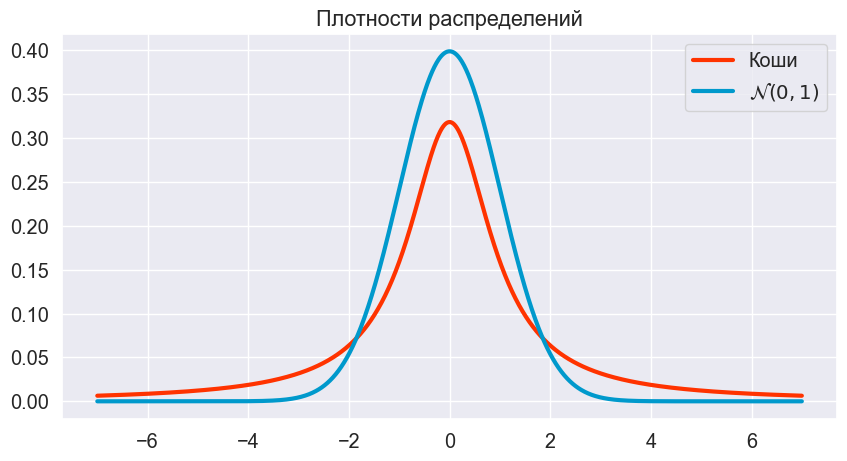

In [68]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [121]:
# ваш код
sample_count = int(1e5)
sample_size = 30
sample_norm = sps.norm.rvs(size=(sample_count, sample_size))

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

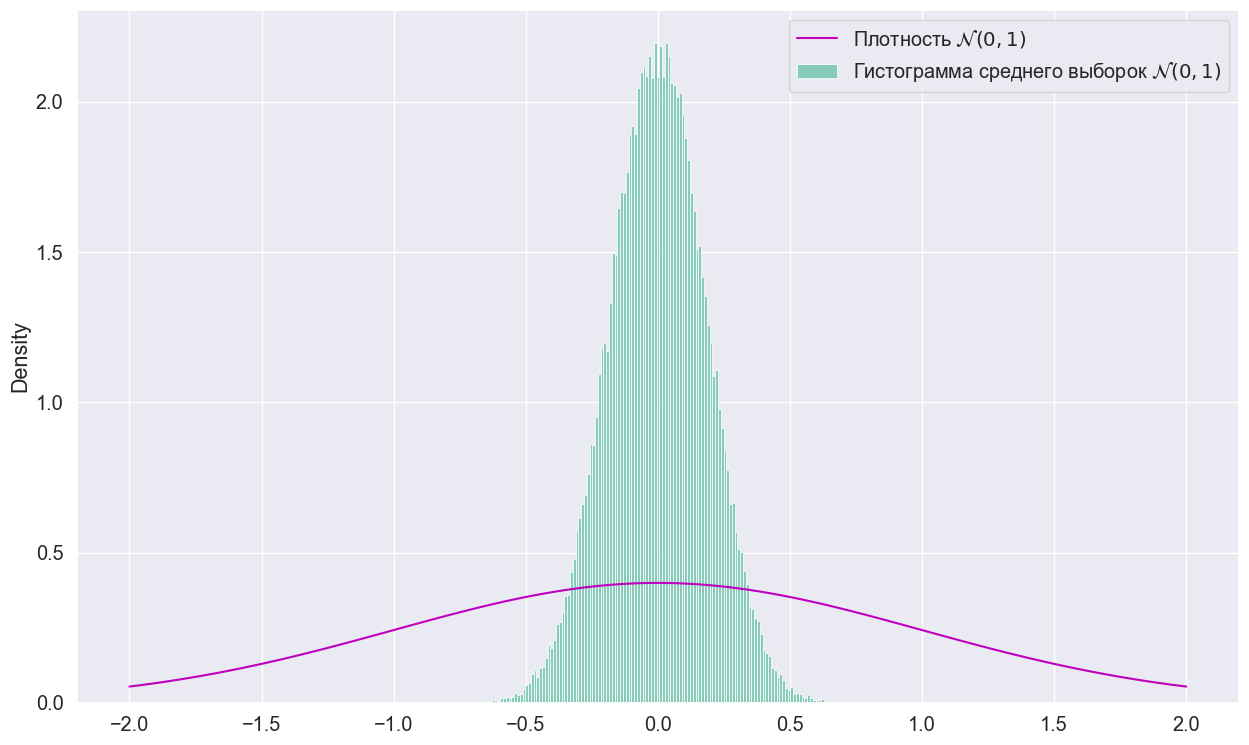

In [122]:
# ваш код
means_norm = sample_norm.mean(axis=1)

plt.figure(figsize=(15, 9))
sns.histplot(means_norm, stat='density', label='Гистограмма среднего выборок $\mathcal{N}(0, 1)$')
sns.lineplot(x=np.linspace(-2, 2, 100), 
             y=sps.norm().pdf(np.linspace(-2, 2, 100)),
             label='Плотность $\mathcal{N}(0, 1)$',
             c='m')
plt.legend();

**Вывод:**

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [123]:
# ваш код
sample_count = int(1e5)
sample_size = 30
sample_ca = sps.cauchy.rvs(size=(sample_count, sample_size))

Построим аналогичный график. 

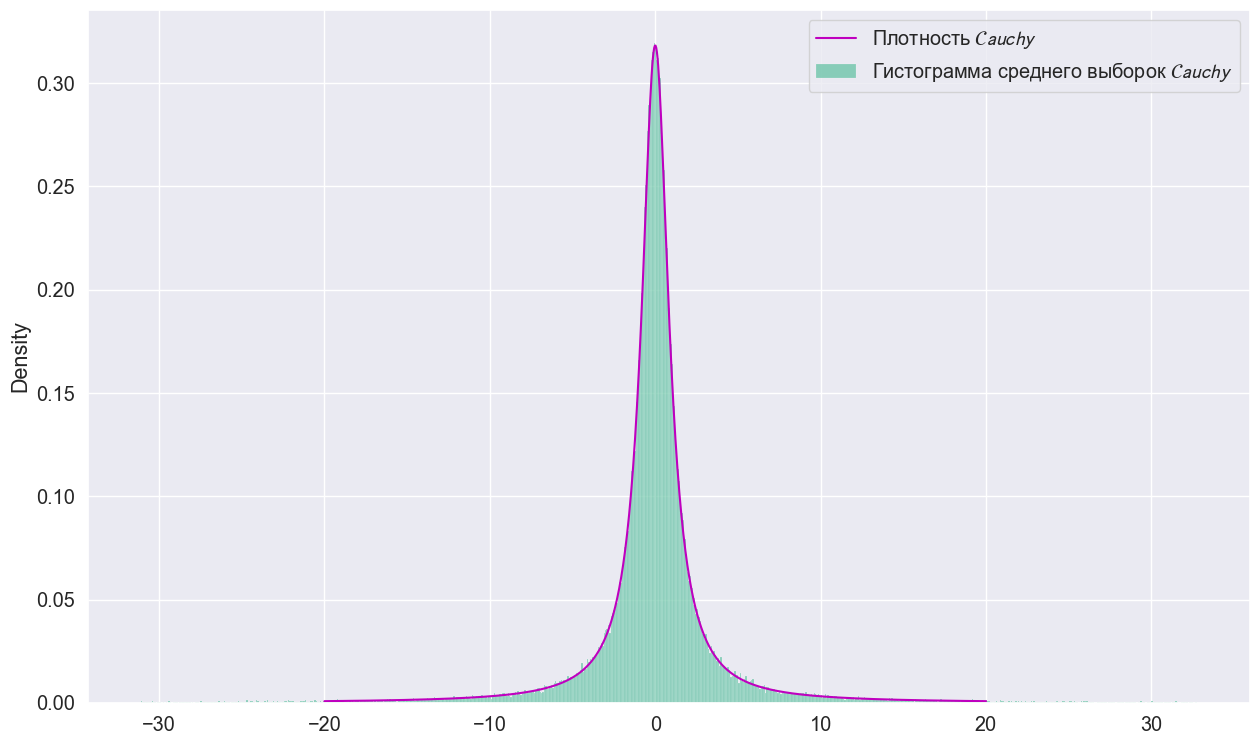

In [128]:
# ваш код
means_ca = sample_ca.mean(axis=1)

plt.figure(figsize=(15, 9))
sns.histplot(sorted(means_ca)[1000:-1000], stat='density', label='Гистограмма среднего выборок $\mathcal{Cauchy}$')
sns.lineplot(x=np.linspace(-20, 20, 1000), 
             y=sps.cauchy.pdf(np.linspace(-20, 20, 1000)),
             label='Плотность $\mathcal{Cauchy}$',
             c='m')
plt.legend();

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:** Когда мы усредняем нормальное распределение, дисперсия уменьшается, поэтому в области нуля у гистограммы гораздо более высокая плотность. 

При усреднении выборки из распределения Коши, дисперсия никак не изменяется, так как у него нет матожидания, и, как следствие, ЦПТ не выполняется. Поэтому гистограмму полностью повторяет исиходное распределение.

## Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения $U[0, \theta]$.


1. Постройте асимптотический доверительный интервал для $\theta$, используя асимптотически нормальную оценку $\theta$.




**Ответ:** $(2\overline X \pm \frac{z_{\frac{1 + \alpha}{2}} \cdot 2\overline X}{\sqrt{3n}})$

2. Постройте точный доверительный интервал для $\theta$, используя статистику $X_{(n)}$.

    - Найдите функцию распредления $X_{(n)}$ по определению. 
    - Точный доверительный интервал для $\theta$ имеет смысл строить в виде $(X_{(n)}, X_{(n)} + c_{\alpha})$ (поясните почему). 
    - Нужно найти такое $c_{\alpha}$, что $\mathsf{P_{\theta}}(\theta \in (X_{(n)}, X_{(n)} + c_{\alpha})) = \alpha$ 

**Ответ:** В фотографии

Визуализируйте интервалы. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

In [173]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color_estimation=None,
    color_interval=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
        
    # ваш код

    n = len(sample)
    time = np.arange(1, n + 1)

    plt.figure(figsize=(15, 6))
    plt.scatter(y=sample, x=np.zeros(n), label=sample_label)
    plt.plot(time, estimation, c=color_estimation, label=estim_label)
    plt.fill_between(time, left, right, color=color_interval, alpha=0.3, label=interval_label)
    plt.legend(fontsize=16)
    plt.ylim(ylim) 
    plt.xlabel('Размер выборки')
    plt.title('Зависимость доверительного интервала от размера выборки')


**Решение:**

In [174]:
def calculate_confidence_intervals(sample, alpha=0.95):
    n_grid = np.arange(1, len(sample)+1)
    x_n = np.array([np.max(sample[:n]) for n in n_grid])
    factors = np.power(1-alpha, 1/n_grid)
    right = x_n / factors
    left = x_n
    return x_n, left, right

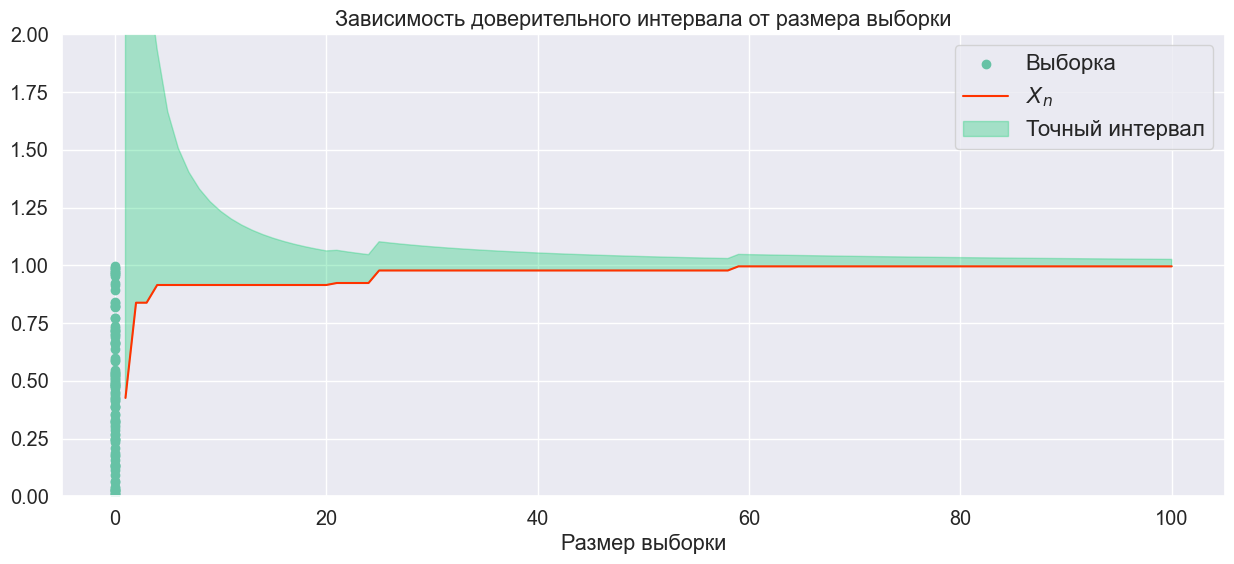

In [178]:
sample = sps.uniform(loc=0, scale=1).rvs(size=100)
estimation, left, right = calculate_confidence_intervals(sample)
draw_confidence_interval(left, right, estimation, sample, estim_label='$X_{n}$', interval_label='Точный интервал', 
                         color_estimation='#FF3300', color_interval='#00CC66', sample_label='Выборка', ylim=(0, 2))

**Вывод**: При всех n theta попадает в интервал. Очев, при малых n интервал большой. При больших n estimation стремится к 1, причём интервал сужается.


## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

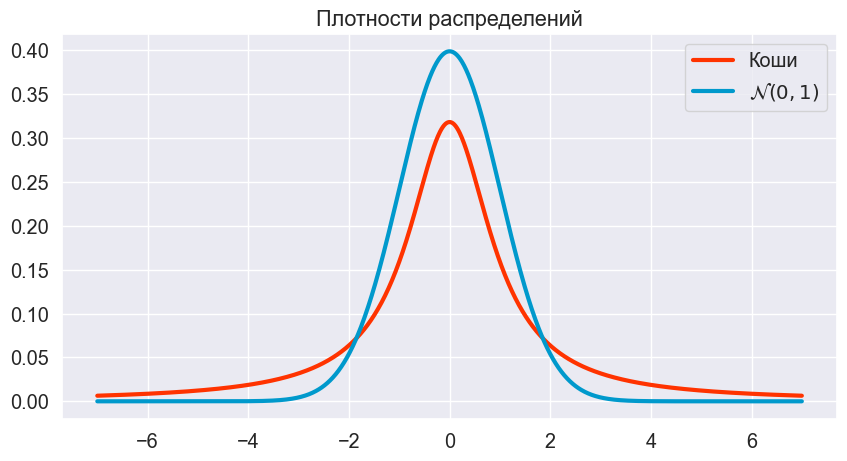

In [179]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

**Вывод:**

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:** Аналитическое выражение в фотографии.

In [2]:
theta = 0
a = np.linspace(0.01, 0.49, 1000)
u = sps.cauchy.ppf(1-a)
sigma = 2 / ((1-2*a)**2) * (a * u**2 + (u ** 3)/(3 * np.pi * theta + 3 * np.pi))

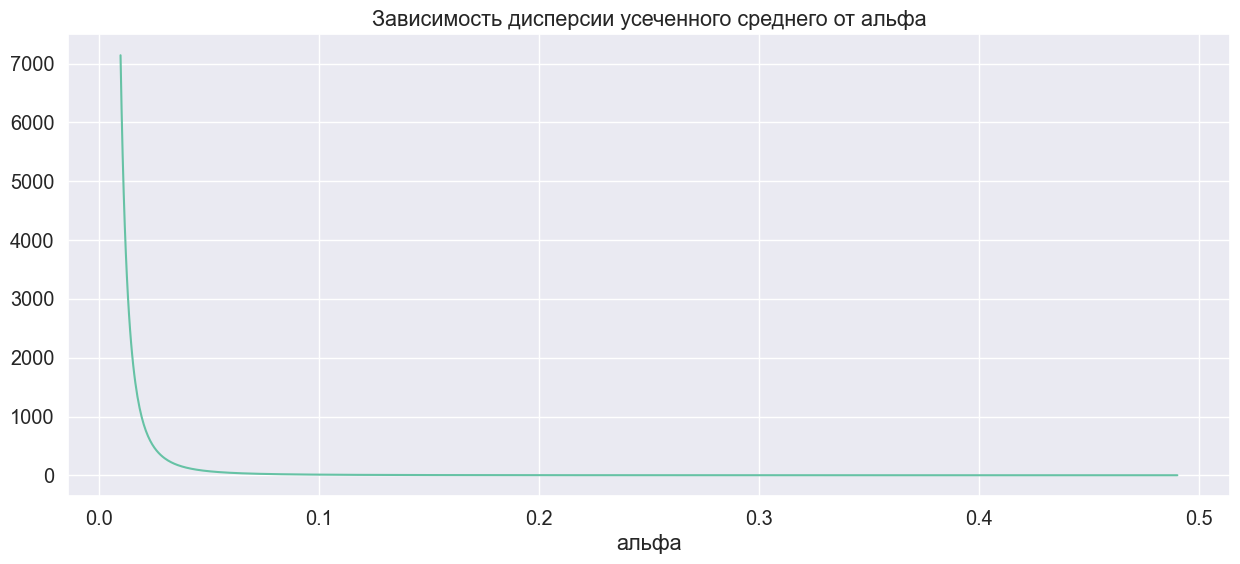

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(a, sigma)
plt.title('Зависимость дисперсии усеченного среднего от альфа')
plt.xlabel('альфа');

In [204]:
idx = np.argmin(sigma)
print(a[idx].round(4))

0.3949


При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:** При альфа=0.3949

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

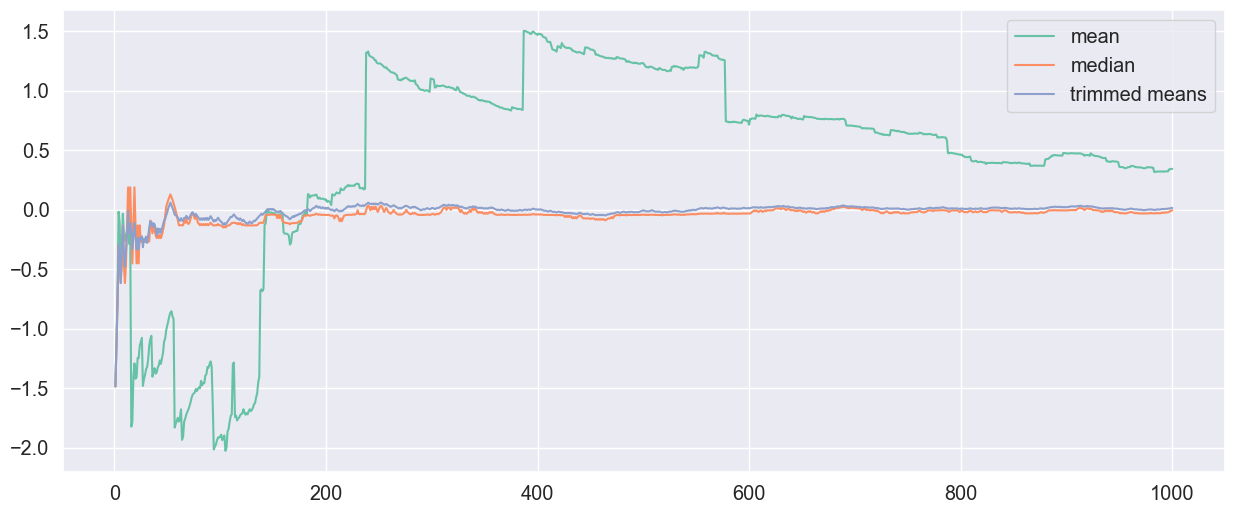

In [206]:
sample = sps.cauchy.rvs(size=1000)
best_alpha = 0.3949

n_grid = np.arange(1, 1001)
means = np.cumsum(sample) / n_grid
medians = np.array([np.median(sample[:n]) for n in n_grid])
means_trimmed = np.array([sps.trim_mean(sample[:n], best_alpha) for n in n_grid])

plt.figure(figsize=(15, 6))
plt.plot(n_grid, means, label='mean')
plt.plot(n_grid, medians, label='median')
plt.plot(n_grid, means_trimmed, label='trimmed means')
plt.legend()

(-2.5, 2.5)

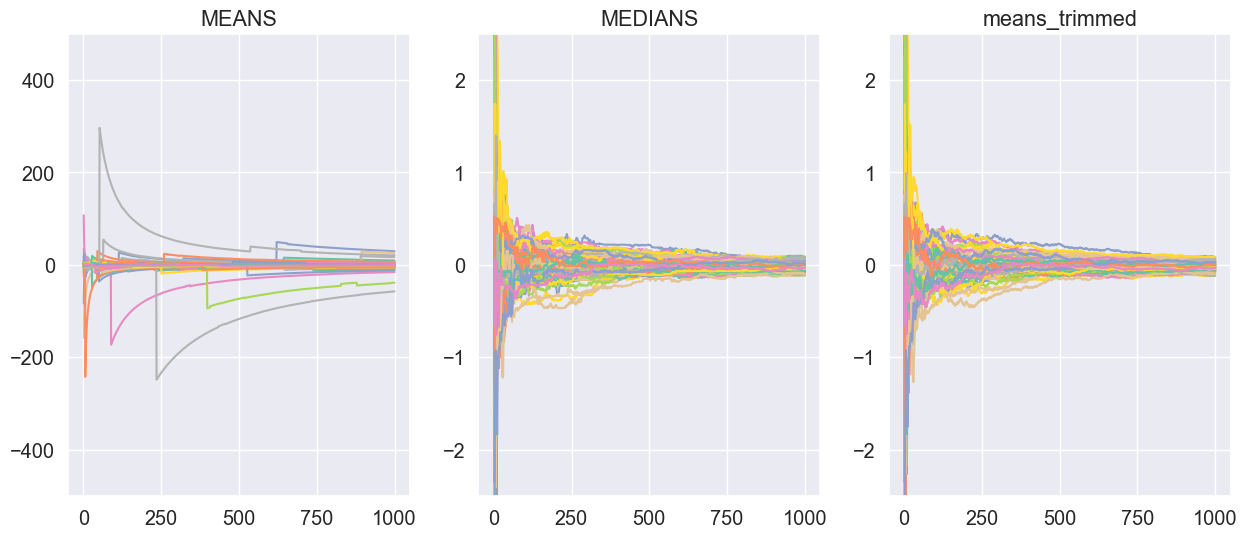

In [218]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sample = sps.cauchy.rvs(size=(100, 1000))
n_grid = np.arange(1, 1001)


for i in range(100):
    means = np.cumsum(sample[i]) / n_grid
    medians = np.array([np.median(sample[i][:n]) for n in n_grid])
    means_trimmed = np.array([sps.trim_mean(sample[i][:n], best_alpha) for n in n_grid])
    axes[0].plot(n_grid, means)
    axes[1].plot(n_grid, medians)
    axes[2].plot(n_grid, means_trimmed)

axes[0].set_title('MEANS')
axes[0].set_ylim(-500, 500)
axes[1].set_title('MEDIANS')
axes[1].set_ylim(-2.5, 2.5)
axes[2].set_title('means_trimmed')
axes[2].set_ylim(-2.5, 2.5)

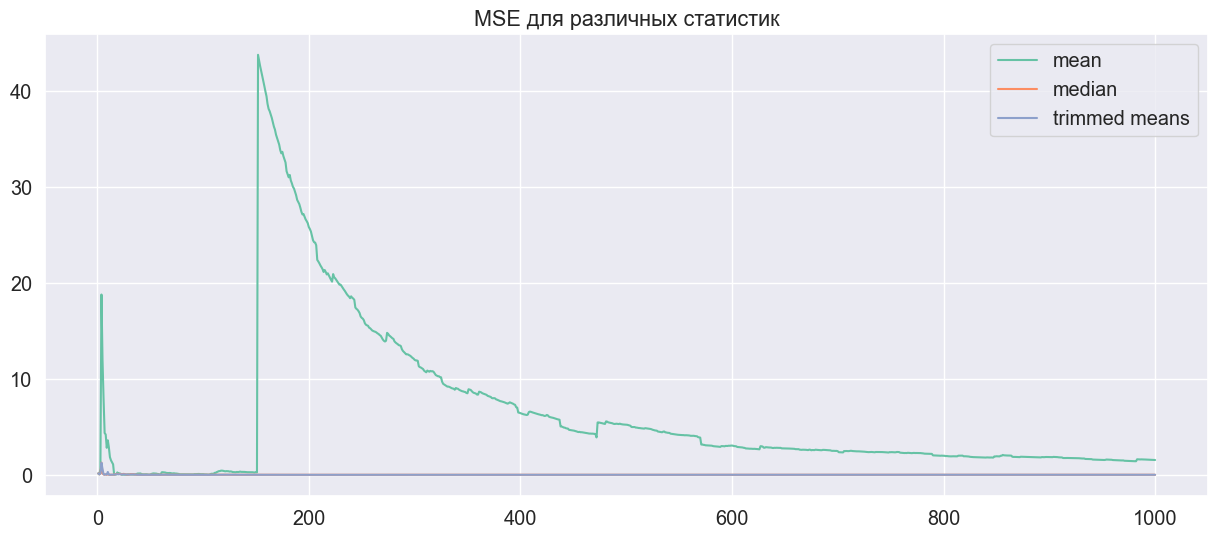

In [231]:
sample = sps.cauchy.rvs(size=1000)
best_alpha = 0.3949

n_grid = np.arange(1, 1001)
means = np.cumsum(sample) / n_grid
medians = np.array([np.median(sample[:n]) for n in n_grid])
means_trimmed = np.array([sps.trim_mean(sample[:n], best_alpha) for n in n_grid])

plt.figure(figsize=(15, 6))
plt.plot(n_grid, (means-0)**2, label='mean')
plt.plot(n_grid, (medians-0)**2, label='median')
plt.plot(n_grid, means_trimmed**2, label='trimmed means')
plt.title('MSE для различных статистик')
plt.legend()

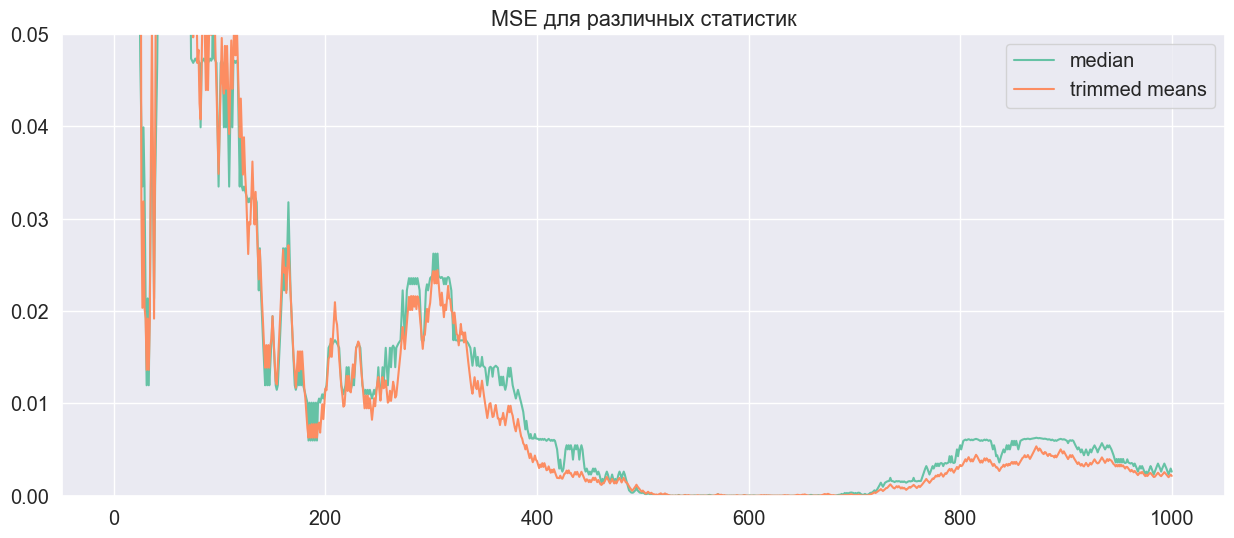

In [228]:
sample = sps.cauchy.rvs(size=1000)
best_alpha = 0.3949

n_grid = np.arange(1, 1001)
medians = np.array([np.median(sample[:n]) for n in n_grid])
means_trimmed = np.array([sps.trim_mean(sample[:n], best_alpha) for n in n_grid])

plt.figure(figsize=(15, 6))
plt.plot(n_grid, (medians)**2, label='median')
plt.plot(n_grid, means_trimmed**2, label='trimmed means')
plt.ylim(0, 0.05)
plt.title('MSE для различных статистик')
plt.legend()

**Вывод:** При больших N усеченное среднее действительно лучше справляется с оценкой параметра.